# Text Clustering

---

Clustering textual é uma das técnicas mais reelevantes do aprendizado de máquina voltado ao processamento de linguagem natural (PLN).

Neste notebook, nos dedicamos a abordar os principais conceitos do clustering textual com aplicações e exercícios em um conjunto de dados de Leis Brasileiras.

## O que é Clustering?

*Clustering* (agrupamento) é o processo de dividir um conjunto de dados em grupos (partições) baseando-se apenas na sua estrutura inerente e nas relações entre as entradas.

Geralmente, consideramos que entradas que pertencem ao mesmo cluster(grupo) são 'semelhantes', enquanto entradas que pertencem a clusters distintos são 'diferentes'. Esta noção nos ajuda a organizar automaticamente nosso conjunto de dados e facilita sua análise. 

Algoritmos de clustering pertencem à classe não-supervisionada, isto é, não dependem de rótulos dados por humanos no seu treinamento.

Existem múltiplos algoritmos de clustering, com diferentes estratégias (baseado em densidade, baseado em distância) e com diferentes abordagens (hierárquico, não-hierárquico), a escolha de qual algoritmo utilizar depende da aplicação e do nosso conhecimento sobre a distribuição dos dados.

<a href="https://imgbb.com/"><img src="https://i.ibb.co/zZv08wC/exemplo-de-clustering.png" alt="exemplo-de-clustering" border="0"></a>

**Clustering textual** se refere à aplicação de técnicas de clustering em dados textuais. Ele pode ser útil em várias áreas, com funções distintas:

- **Meio Jurídico**: Detecção de causas repetidas, agrupamento de causas semelhantes

- **Acadêmico**: Agrupar artigos por similaridade de tópicos

- **Biblioteca**: Ajudar a organizar os acervos por similaridade temática

- **Programação**: Detectar algoritmos que resolvem o mesmo tipo de problema



Na sequência, abordaremos o passo a passo tradicional de uma aplicação de clustering textual.



### Importando os dados

O primeiro passo é importar os dados que iremos utilizar.

Realizaremos nossos experimentos em um conjunto de dados contendo as Ementas de [Leis Ordinarias Brasileiras](http://www4.planalto.gov.br/legislacao/portal-legis/legislacao-1/leis-ordinarias#:~:text=S%C3%A3o%20as%20leis%20t%C3%ADpicas%2C%20ou,Federal%20presentes%20durante%20a%20vota%C3%A7%C3%A3o.)
dos anos de 2002 a 2020

In [ ]:
import pandas as pd

In [ ]:
data = pd.read_csv('leis_ordinarias_2002_2020.csv')
data.head()

,lei,ementa,ano
0,"Lei nº 14.116, de 31.12.2020\nPublicada no DOU...",Dispõe sobre as diretrizes para a elaboração e...,2020
1,"Lei nº 14.115, de 29.12.2020\nPublicada no DOU...",Estabelece o aumento da participação da União ...,2020
2,"Lei nº 14.114, de 29.12.2020\nPublicada no DOU...",Abre aos Orçamentos Fiscal e da Seguridade Soc...,2020
3,"Lei nº 14.113, de 25.12.2020\nPublicada no DOU...",Regulamenta o Fundo de Manutenção e Desenvolvi...,2020
4,"Lei nº 14.112, de 24.12.2020\nPublicada no DOU...","Altera as Leis n os 11.101, de 9 de fevereiro ...",2020


In [ ]:
print( f"Número de textos - {len(data)}" )

Número de textos - 3716


Selecionando os textos

In [ ]:
textos = data['ementa']
textos.head()

0    Dispõe sobre as diretrizes para a elaboração e...
1    Estabelece o aumento da participação da União ...
2    Abre aos Orçamentos Fiscal e da Seguridade Soc...
3    Regulamenta o Fundo de Manutenção e Desenvolvi...
4    Altera as Leis n os 11.101, de 9 de fevereiro ...
Name: ementa, dtype: object

Alguns exemplos aleatórios do formato de uma ementa

In [ ]:
print(textos[0], end='\n\n')
print(textos[16], end='\n\n')
print(textos[40], end='\n\n')

Dispõe sobre as diretrizes para a elaboração e a execução da Lei Orçamentária de 2021 e dá outras providências.    Mensagem de veto

Abre aos Orçamentos Fiscal e da Seguridade Social da União, em favor dos Ministérios da Saúde, do Desenvolvimento Regional e da Cidadania, crédito suplementar no valor de R$ 3.181.000,00, para reforço de dotações constantes da Lei Orçamentária vigente.

Altera as Leis n os 9.440, de 14 de março de 1997, 9.826, de 23 de agosto de 1999, e 7.827, de 27 de setembro de 1989, a fim de prorrogar incentivos fiscais para o desenvolvimento regional, na forma que especifica.



### Pré processamento 


A etapa de pré processamento é uma das mais importantes, é nela que decidimos o formato final que o texto terá antes de ser transformado em números.

Vamos focar especialmente em técnicas de *Normalização textual*, mas tenha em mente que várias outras técnicas existem e depende bastante da aplicação a ser desenvolvida quais delas iremos utilizar.

Técnicas de normalização textual focam principalmente em reduzir a variância existente em termos e palavras de um texto a estruturas mais simples.

Por exemplo, as palavras 'casa', 'casas' e 'casinha' referem-se fundamentalmente à mesma estrutura, talvez seja interessante para o algoritmo que não haja distinção entre elas. Por isso, podemos trocar todas elas por uma única palavra, como 'casa'.

No nosso dataset, temos várias leis que citam valores monetários (como R$ 100.000,25), como todos referem-se a valores em dinheiro, podemos reduzir todos eles ao termo <DINHEIRO>.

In [ ]:
import re

def sub_dinheiro(texto):
  regex_pattern = r'[R][$][ ]\d{1,3}(?:\.\d{3})*?,\d{2}'
  return re.sub(regex_pattern, '<DINHEIRO>', texto )

print( sub_dinheiro('Abre orçamento de R$ 332.212,20') )
print( sub_dinheiro('Abre orçamento com valor de R$ 214,12') )
print( sub_dinheiro('R$ 1.000.000,25 é o prêmio do BBB') )

Abre orçamento de <DINHEIRO>
Abre orçamento com valor de <DINHEIRO>
<DINHEIRO> é o prêmio do BBB


Vamos realizar o seguinte processamento:

- Substituir os valores em dinheiro pelo termo [DINHEIRO]
- Colocar todo o texto em *lowercase* (NÃO -> não)

In [ ]:
## Substituindo os valores em Dinheiro
textos = textos.apply( sub_dinheiro )

## Colocando os textos em lowercase
textos = textos.apply( lambda x: x.lower() )

Visualizando alguns exemplos

In [ ]:
print(textos[0], end='\n\n')
print(textos[16], end='\n\n')
print(textos[40], end='\n\n')

dispõe sobre as diretrizes para a elaboração e a execução da lei orçamentária de 2021 e dá outras providências.    mensagem de veto

abre aos orçamentos fiscal e da seguridade social da união, em favor dos ministérios da saúde, do desenvolvimento regional e da cidadania, crédito suplementar no valor de <dinheiro>, para reforço de dotações constantes da lei orçamentária vigente.

altera as leis n os 9.440, de 14 de março de 1997, 9.826, de 23 de agosto de 1999, e 7.827, de 27 de setembro de 1989, a fim de prorrogar incentivos fiscais para o desenvolvimento regional, na forma que especifica.



### Feature Extraction



Feature extraction ou vectorization é a etapa de transformar o conteúdo textual em valores numéricos.

Esta é a etapa mais importante de qualquer aplicação em NLP, e vem sendo tema de longos estudos. É nela que decidimos como o nosso texto será 'interpretado' pelo computador, é ela quem define a forma e a distribuição dos dados finais.

Decidimos utilizar o método TF-IDF para vetorização dos nossos textos.

Não vamos nos aprofundar muito nos detalhes do método, mas, em resumo, ele é capaz de construir um vetor de tamanho $K$ para cada um dos textos da base, onde cada dimensão do vetor representa uma palavra do vocabulário.
Mais sobre, em [[1]](https://pt.wikipedia.org/wiki/Tf%E2%80%93idf)[[2]](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html)

Vamos utilizar a versão do Scikit-learn para realizar a vetorização.

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=1000)
# max_features=1000 significa que só iremos considerar as 1000 palavras mais frequentes
# pode ser entendido como uma técnica de normalização textual

textos_vec = vectorizer.fit_transform(textos).todense()

Como podemos ver abaixo, a cada um dos 3716 textos foi associado um vetor de dimensão 1000.

In [ ]:
textos_vec.shape

(3716, 1000)

### Escolha do Algoritmo



A última etapa antes do treinamento de modelo diz respeito ao tema princial desse notebook, que é a escolha do algoritmo de clusterização.

Os algoritmos disponíveis são muito diversos, abordam o problema de formas muito distintas e encontram resultados igualmente distintos. Explicar cada algoritmo, mesmo ranqueando os principais, tomaria bastante tempo e esforço.

Ao invés disso, vamos nomear algumas estratégias e atributos deles e explica-las brevemente.

**O que ele considera um cluster?**
1.   Baseado em densidade: Considera que grupos são áreas contínuas com alta densidade de pontos.
2.   Baseado em distância: Considera que um grupo é um conjunto de pontos com distância média par-a-par baixa.

**Como ele monta o cluster?**
1. Não-Hierárquico: Realiza os cálculos necessários e monta um conjunto definitivo de clusters.
2. Hierárquico: Começa montando clusters pequenos e os utiliza para montar clusters maiores, até que uma condição seja satisfeita.

**Como cada entrada se relaciona com os clusters?**
1. *Hard-clustering*: Cada entrada pertence a um único grupo.
2. *Soft* ou *Fuzzy*: Cada entrada pertence a vários grupos ao mesmo tempo, com intensidades únicas a cada um deles.


**Como ele encontra o número de clusters**
1. Precisamos definir manualmente
2. O algoritmo automaticamente 



A decisão de qual algoritmo utilizar é geralmente difícil, bem como avaliar se o clustering está 'correto'.

O algoritmo utilizado será o K-Means, o mais importante do clustering. Ele é um algoritmo de hard-clustering, não-hierárquico baseado em distância. Sua estratégia é encontrar 'centróides' que minimizem a distância dos pontos a eles. 

Mais detalhes em [[3]](https://pt.wikipedia.org/wiki/K-means)

Também utilizaremos a implementação do Sklearn.

### Treinamento e visualização

Vamos criar uma instância do algoritmo 

In [ ]:
from sklearn.cluster import KMeans
import numpy as np

# Definimos que o número de clusters será 8
kmeans = KMeans(8)

y_clusters = kmeans.fit_predict(textos_vec)

Como podemos ver, cada a cda texto foi atribuído um grupo. 

In [ ]:
y_clusters

array([0, 1, 3, ..., 6, 5, 0], dtype=int32)

Para visualizar o resultado da clusterização vamos sortear aleatoriamente alguns textos de cada cluster.

In [ ]:
np.random.seed(214)
N_SAMPLE = 5

for i in range( kmeans.n_clusters ):
  print(f'Cluster - {i}')
  for e in textos[ np.random.choice( np.argwhere(y_clusters==i).flatten(), size=N_SAMPLE ) ]:
    print(e)
  print()

Cluster - 0
inscreve o nome de francisco josé do nascimento, o dragão do mar, no livro dos heróis da pátria.
obriga a que os produtos alimentícios comercializados informem sobre a presença de glúten, como medida preventiva e de controle da doença celíaca.
mensagem de veto
dispõe sobre o reajustamento dos valores dos soldos dos militares das forças armadas, e dá outras providências.
dispõe sobre os recursos destinados aos pagamentos decorrentes de precatórios e de requisições de pequeno valor (rpv) federais.      mensagem de veto
dispõe sobre a utilização e proteção da vegetação nativa do bioma mata atlântica, e dá outras providências. mensagem de veto

Cluster - 1
dispõe sobre a política nacional de desenvolvimento sustentável da aquicultura e da pesca, regula as atividades pesqueiras, revoga a lei n o 7.679, de 23 de novembro de 1988, e dispositivos do decreto-lei n o 221, de 28 de fevereiro de 1967, e dá outras providências.
altera a lei nº 11.798, de 29 de outubro de 2008, para disp

Como podemos ver, os grupos gerados realmente seguem algum sentido interpretável.

Por exemplo, o cluster 1 aparentemente contém ementas de leis que inscrevem o nome de pessoas importantes no livro de heróis da pátria.

O Cluster 4 trata da criação de dias especiais e comemorativos, enquanto o 5 trata de denominações de locais. 

Por fim, podemos realizar uma redução de dimensionalidade das 1000 dimensões originais para apenas 2, com intuito de visualizarmos a 'distribuição' dos textos.

In [ ]:
!pip install umap-learn

In [ ]:
import umap

In [ ]:
reducer = umap.UMAP(n_neighbors=17, random_state=214)
textos_vec2d = reducer.fit_transform(textos_vec)

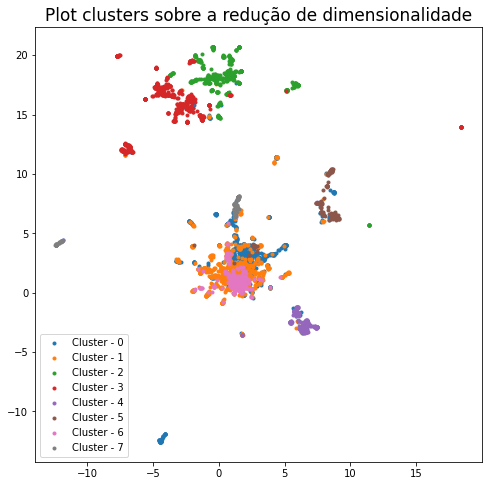

In [ ]:
plt.figure( figsize=(8,8) )
for i in range( kmeans.n_clusters ):
  ids = np.argwhere(y_clusters==i).flatten()
  x = textos_vec2d[ids, 0 ]
  y = textos_vec2d[ids, 1 ]
  plt.scatter(x, y, 
              s=9,
              alpha=1,
              label=f'Cluster - {i}')
plt.title("Plot clusters sobre a redução de dimensionalidade", fontsize=17)
plt.legend()
plt.show()

## Conclusão

Neste notebook, nos dedicamos a estudar o clustering de textos com um caso prático de estudo sobre uma base de dados de Leis Brasileiras.

Todos os tópicos foram abordados de maneira breve, cada um deles é assunto de longas e profundas pesquisas, nos focamos apenas em dar uma visão geral do passo a passo que envolve o clustering textual.